In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import shapiro, normaltest
from scipy.stats import skew, kurtosis

In [2]:
dataset_files = [
    "../data/GEOS_and_QCLS_CO_ATom1_20160822.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160820.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160817.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160815.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160812.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160808.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160806.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160803.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160801.csv",
    "../data/GEOS_and_QCLS_CO_ATom1_20160729.csv"
]

In [3]:
merged_df = pd.DataFrame()

In [4]:
for file in dataset_files:
    df = pd.read_csv(file)
    # Extract date from filename and create a new column
    date = file.split('_')[-1].replace('.csv', '')
    df['Date'] = pd.to_datetime(date, format='%Y%m%d')
    merged_df = pd.concat([merged_df, df], ignore_index=True)

In [5]:
merged_df

,time,Lat,Lon,Pressure,QCLS_CO,GEOS_CO,CO_bbGlobal,CO_bbNAm,CO_bbSAm,CO_bbAfrica,CO_bbEuras,CO_nbGlobal,CO_nbAsia,CO_nbNam,CO_nbEuro,Date
0,46410.0,66.9995,-50.7712,994.770,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-08-22
1,46420.0,66.9948,-50.7917,986.358,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-08-22
2,46430.0,66.9898,-50.8134,976.933,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-08-22
3,46440.0,66.9845,-50.8364,966.357,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-08-22
4,46450.0,66.9790,-50.8604,951.901,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30863,86140.0,34.6338,-118.0550,912.442,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-07-29
30864,86150.0,34.6334,-118.0630,916.310,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-07-29
30865,86160.0,34.6329,-118.0700,919.974,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-07-29
30866,86170.0,34.6326,-118.0780,923.615,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0,2016-07-29


In [6]:
# Drop rows with invalid QCLS_CO values
merged_df = merged_df[merged_df['QCLS_CO'] != -99999]

In [7]:
merged_df

,time,Lat,Lon,Pressure,QCLS_CO,GEOS_CO,CO_bbGlobal,CO_bbNAm,CO_bbSAm,CO_bbAfrica,CO_bbEuras,CO_nbGlobal,CO_nbAsia,CO_nbNam,CO_nbEuro,Date
11,46520.0,66.9361,-51.0480,876.092,99.9219,94.6207,16.48900,4.33832,0.358439,0.841390,9.306080,78.0403,24.64980,19.9614,9.58777,2016-08-22
12,46530.0,66.9324,-51.0815,865.859,98.3772,94.6247,16.50810,4.34918,0.358168,0.841612,9.292690,78.0520,24.67300,20.0019,9.54699,2016-08-22
13,46540.0,66.9268,-51.1136,854.979,100.5030,94.6364,16.52400,4.36201,0.362277,0.841260,9.285280,78.0620,24.69410,20.0299,9.51401,2016-08-22
14,46550.0,66.9197,-51.1439,844.094,102.1160,94.6560,16.53110,4.37508,0.368253,0.839677,9.284080,78.0660,24.69790,20.0430,9.50064,2016-08-22
15,46560.0,66.9128,-51.1741,833.437,102.1830,94.6737,16.52580,4.38289,0.373137,0.836593,9.285660,78.0759,24.70300,20.0533,9.49127,2016-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30649,84000.0,31.9014,-120.2840,197.166,81.7372,80.2713,7.80507,2.69567,0.983358,2.543950,0.744159,72.4606,8.74585,24.0842,1.70375,2016-07-29
30650,84010.0,31.9219,-120.2760,196.973,81.6502,79.7953,7.79285,2.67289,0.991608,2.551510,0.744006,71.9908,8.76484,23.8719,1.70576,2016-07-29
30651,84020.0,31.9413,-120.2660,196.419,81.6025,79.2758,7.77813,2.65012,0.998529,2.556580,0.743875,71.4831,8.78879,23.6605,1.70758,2016-07-29
30652,84030.0,31.9588,-120.2510,196.501,80.7456,78.8361,7.76658,2.62914,1.006170,2.563680,0.743519,71.0543,8.80235,23.4674,1.70932,2016-07-29


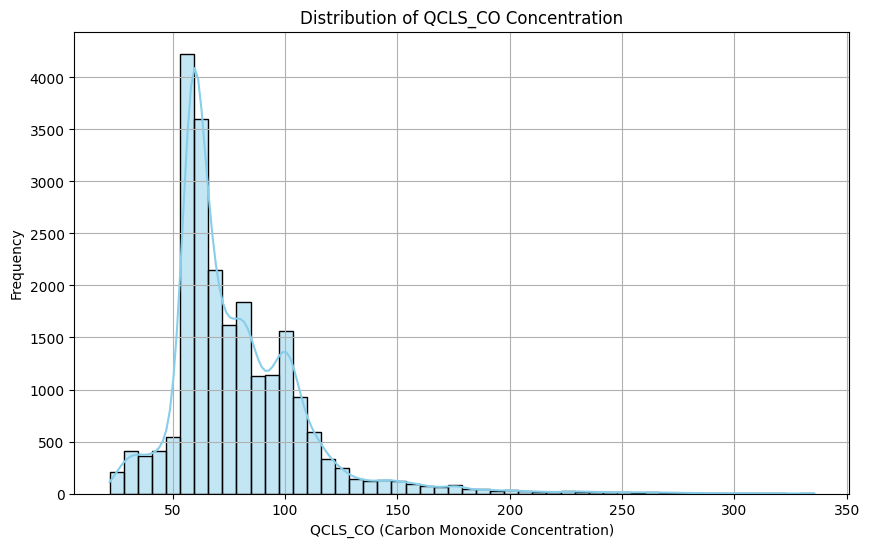

In [8]:
# Plot the distribution of QCLS_CO
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['QCLS_CO'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of QCLS_CO Concentration')
plt.xlabel('QCLS_CO (Carbon Monoxide Concentration)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
# Calculate mean and standard deviation
mean_qcls = merged_df['QCLS_CO'].mean()
std_qcls = merged_df['QCLS_CO'].std()
print(f"Mean of QCLS_CO: {mean_qcls}")
print(f"Standard Deviation of QCLS_CO: {std_qcls}")

Mean of QCLS_CO: 78.29371032732132
Standard Deviation of QCLS_CO: 30.67523860767679


In [10]:
# Remove missing values from QCLS_CO
qcls_co_clean = merged_df['QCLS_CO'].dropna()

# 1. Skewness and Kurtosis
skewness = skew(qcls_co_clean)
kurt = kurtosis(qcls_co_clean)

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurt:.4f}")

Skewness: 2.1173
Kurtosis: 8.0638


In [11]:
# 2. Shapiro-Wilk Test (Good for small to moderate datasets)
shapiro_stat, shapiro_p = shapiro(qcls_co_clean.sample(5000))  # Sampling to avoid memory issues
print(f"\nShapiro-Wilk Test:\nStatistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")


Shapiro-Wilk Test:
Statistic=0.8323, p-value=0.0000


In [12]:
# 3. D'Agostino and Pearson's Test (Good for large datasets)
dagostino_stat, dagostino_p = normaltest(qcls_co_clean)
print(f"\nD’Agostino and Pearson’s Test:\nStatistic={dagostino_stat:.4f}, p-value={dagostino_p:.4f}")


D’Agostino and Pearson’s Test:
Statistic=10498.3123, p-value=0.0000


In [13]:
# Proportion of data within 1, 2, and 3 standard deviations
for k in [1, np.sqrt(2), 2, 3]:
    lower_bound = mean_qcls - k * std_qcls
    upper_bound = mean_qcls + k * std_qcls
    proportion = merged_df[(merged_df['QCLS_CO'] >= lower_bound) & (merged_df['QCLS_CO'] <= upper_bound)].shape[0] / merged_df.shape[0]
    chebyshev_bound = 1 - (1 / k**2) if k != 1 else 'Not Defined'
    print(f"Proportion within {k} standard deviation(s): {proportion:.4f}")
    print(f"Chebyshev's bound for {k} standard deviation(s): {chebyshev_bound}")

Proportion within 1 standard deviation(s): 0.8298
Chebyshev's bound for 1 standard deviation(s): Not Defined
Proportion within 1.4142135623730951 standard deviation(s): 0.9082
Chebyshev's bound for 1.4142135623730951 standard deviation(s): 0.5000000000000001
Proportion within 2 standard deviation(s): 0.9588
Chebyshev's bound for 2 standard deviation(s): 0.75
Proportion within 3 standard deviation(s): 0.9806
Chebyshev's bound for 3 standard deviation(s): 0.8888888888888888


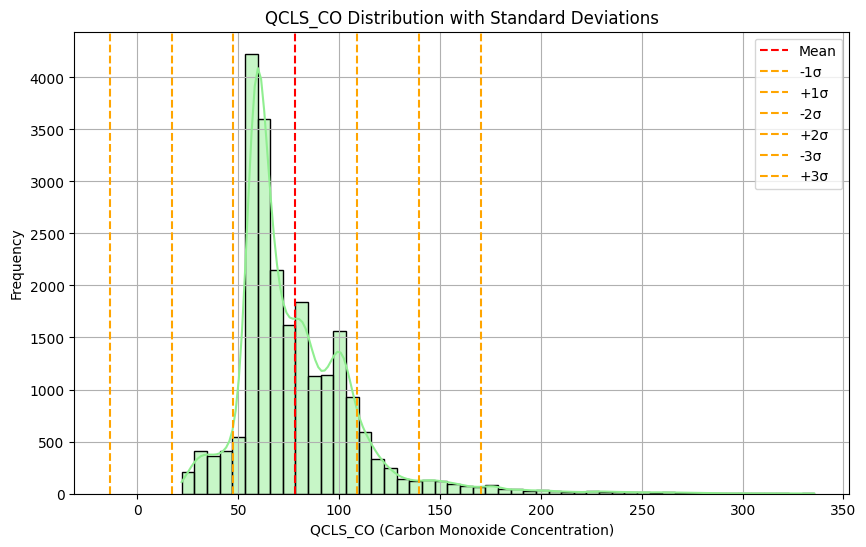

In [14]:
# Visualization with mean and standard deviation lines
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['QCLS_CO'], bins=50, kde=True, color='lightgreen')
plt.axvline(mean_qcls, color='red', linestyle='--', label='Mean')
for k in [1, 2, 3]:
    plt.axvline(mean_qcls - k * std_qcls, color='orange', linestyle='--', label=f'-{k}σ')
    plt.axvline(mean_qcls + k * std_qcls, color='orange', linestyle='--', label=f'+{k}σ')
plt.title('QCLS_CO Distribution with Standard Deviations')
plt.xlabel('QCLS_CO (Carbon Monoxide Concentration)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()
